### Code - Load dependencies

In [1]:
# general
import io

# data
import numpy as np
import pandas as pd

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

### Load the dataset

In [2]:
# @title
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

In [3]:
chicago_taxi_dataset.sample(5)

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
23518,05/16/2022 7:45:00 PM,05/16/2022 8:15:00 PM,19.75,1443,10.88,27.1,NaN,NaN,76.0,16.0,30.25,0.00,0.0,0.0,4.0,34.25,Cash,Sun Taxi
24964,05/18/2022 2:00:00 AM,05/18/2022 2:15:00 AM,2.00,535,4.37,29.4,NaN,NaN,8.0,6.0,16.65,3.83,23.0,0.0,0.0,20.48,Mobile,Star North Taxi Management Llc
30445,05/18/2022 12:00:00 AM,05/18/2022 12:30:00 AM,0.00,1393,16.79,43.4,1.703198e+10,1.703108e+10,76.0,8.0,41.75,1.00,2.1,0.0,6.0,49.25,Credit Card,Flash Cab
30757,05/17/2022 3:15:00 AM,05/17/2022 3:45:00 AM,3.25,1343,16.89,45.3,NaN,NaN,8.0,76.0,42.00,0.00,0.0,0.0,0.0,42.00,Cash,Flash Cab
2182,05/16/2022 3:30:00 PM,05/16/2022 4:00:00 PM,15.50,1873,4.10,7.9,NaN,NaN,7.0,24.0,13.00,2.99,23.0,0.0,0.0,15.99,Mobile,Chicago Independents


In [4]:
chicago_taxi_dataset.shape

(31694, 18)

In [5]:
chicago_taxi_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRIP_START_TIMESTAMP    31694 non-null  object 
 1   TRIP_END_TIMESTAMP      31694 non-null  object 
 2   TRIP_START_HOUR         31694 non-null  float64
 3   TRIP_SECONDS            31694 non-null  int64  
 4   TRIP_MILES              31694 non-null  float64
 5   TRIP_SPEED              31694 non-null  float64
 6   PICKUP_CENSUS_TRACT     13259 non-null  float64
 7   DROPOFF_CENSUS_TRACT    14023 non-null  float64
 8   PICKUP_COMMUNITY_AREA   28477 non-null  float64
 9   DROPOFF_COMMUNITY_AREA  28199 non-null  float64
 10  FARE                    31694 non-null  float64
 11  TIPS                    31694 non-null  float64
 12  TIP_RATE                31694 non-null  float64
 13  TOLLS                   31694 non-null  float64
 14  EXTRAS                  31694 non-null

In [6]:
chicago_taxi_dataset.isnull().sum() / chicago_taxi_dataset.shape[0]*100

TRIP_START_TIMESTAMP       0.000000
TRIP_END_TIMESTAMP         0.000000
TRIP_START_HOUR            0.000000
TRIP_SECONDS               0.000000
TRIP_MILES                 0.000000
TRIP_SPEED                 0.000000
PICKUP_CENSUS_TRACT       58.165583
DROPOFF_CENSUS_TRACT      55.755032
PICKUP_COMMUNITY_AREA     10.150186
DROPOFF_COMMUNITY_AREA    11.027324
FARE                       0.000000
TIPS                       0.000000
TIP_RATE                   0.000000
TOLLS                      0.000000
EXTRAS                     0.000000
TRIP_TOTAL                 0.000000
PAYMENT_TYPE               0.000000
COMPANY                    0.000000
dtype: float64

In [7]:
# Updates dataframe to use specific columns.
training_df = chicago_taxi_dataset[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


## Dataset Exploration

### View dataset statistics

In [118]:
chicago_taxi_dataset.describe(include='all')

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
count,31694,31694,31694.000000,31694.000000,31694.000000,31694.000000,1.325900e+04,1.402300e+04,28477.000000,28199.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694,31694
unique,193,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,31
top,05/17/2022 5:00:00 PM,05/17/2022 6:00:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Credit Card,Flash Cab
freq,331,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14142,7887
mean,NaN,NaN,14.185635,1319.796397,8.289463,20.256544,1.703153e+10,1.703140e+10,35.562138,25.550410,23.905210,3.246130,12.965785,0.002744,2.410468,29.755053,NaN,NaN
std,NaN,NaN,5.159454,928.932873,7.265672,11.110390,3.827747e+05,3.408106e+05,26.421367,20.349707,16.970022,4.284567,15.517765,0.164343,5.805087,23.145537,NaN,NaN
min,NaN,NaN,0.000000,60.000000,0.500000,4.000000,1.703102e+10,1.703101e+10,1.000000,1.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.250000,NaN,NaN
25%,NaN,NaN,10.500000,548.000000,1.720000,11.000000,1.703108e+10,1.703108e+10,8.000000,8.000000,9.000000,0.000000,0.000000,0.000000,0.000000,10.750000,NaN,NaN
50%,NaN,NaN,14.750000,1081.000000,5.920000,17.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,18.750000,2.000000,12.200000,0.000000,0.000000,21.700000,NaN,NaN
75%,NaN,NaN,18.000000,1888.000000,14.500000,27.500000,1.703198e+10,1.703184e+10,59.000000,32.000000,38.750000,5.000000,20.800000,0.000000,4.000000,48.265000,NaN,NaN


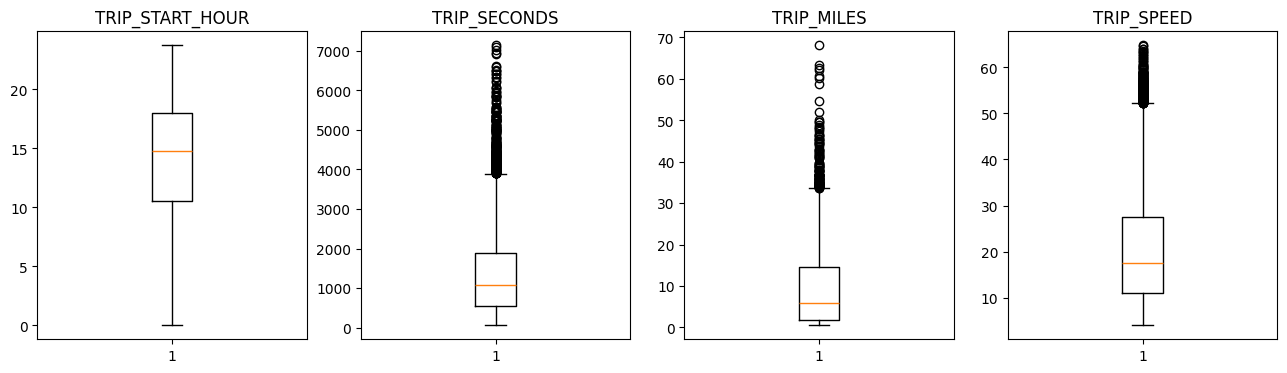

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# numeric columns in DataFrame
col_df_num = chicago_taxi_dataset.select_dtypes(exclude=['object', 'datetime64']).columns.to_list()

n_cols = 4
n_rows = 1

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(16, 4))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(chicago_taxi_dataset[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

### Generate a correlation matrix

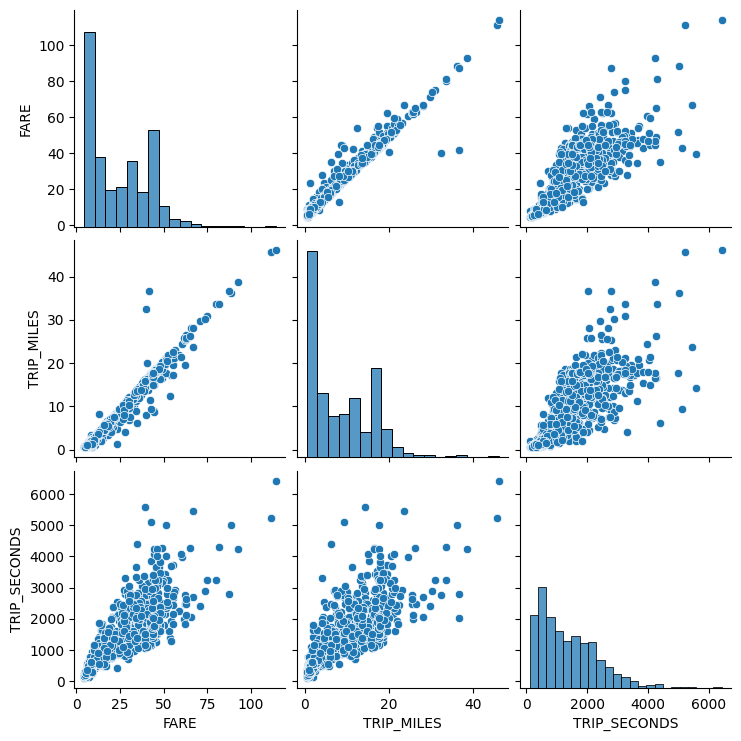

In [9]:
sns.pairplot(chicago_taxi_dataset.sample(1000), x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"], y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

# Feature Engineering

In [10]:
chicago_taxi_dataset.sample(5)

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
11438,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1500,5.50,13.2,NaN,NaN,8.0,28.0,18.00,0.00,0.0,0.0,0.0,18.00,Unknown,Taxi Affiliation Services
12002,05/17/2022 9:00:00 PM,05/17/2022 9:00:00 PM,21.00,188,0.71,13.6,1.703132e+10,1.703132e+10,32.0,32.0,9.00,5.00,55.6,0.0,0.0,14.00,Mobile,Taxicab Insurance Agency Llc
24868,05/17/2022 12:45:00 PM,05/17/2022 1:00:00 PM,12.75,960,7.80,29.3,1.703141e+10,1.703132e+10,41.0,32.0,21.50,4.40,20.5,0.0,0.0,25.90,Credit Card,Taxi Affiliation Services
624,05/17/2022 12:00:00 AM,05/17/2022 12:15:00 AM,0.00,499,0.84,6.1,NaN,NaN,8.0,28.0,9.00,1.04,11.6,0.0,0.0,10.04,Mobile,Flash Cab
14078,05/17/2022 5:30:00 PM,05/17/2022 6:30:00 PM,17.50,3746,16.26,15.6,NaN,NaN,43.0,4.0,52.76,0.00,0.0,0.0,0.0,52.76,Cash,Flash Cab


In [11]:
chicago_taxi_dataset.isna().sum() / chicago_taxi_dataset.shape[0]*100

TRIP_START_TIMESTAMP       0.000000
TRIP_END_TIMESTAMP         0.000000
TRIP_START_HOUR            0.000000
TRIP_SECONDS               0.000000
TRIP_MILES                 0.000000
TRIP_SPEED                 0.000000
PICKUP_CENSUS_TRACT       58.165583
DROPOFF_CENSUS_TRACT      55.755032
PICKUP_COMMUNITY_AREA     10.150186
DROPOFF_COMMUNITY_AREA    11.027324
FARE                       0.000000
TIPS                       0.000000
TIP_RATE                   0.000000
TOLLS                      0.000000
EXTRAS                     0.000000
TRIP_TOTAL                 0.000000
PAYMENT_TYPE               0.000000
COMPANY                    0.000000
dtype: float64

## variables

In [12]:
print(chicago_taxi_dataset['PICKUP_COMMUNITY_AREA'].mean())
print(chicago_taxi_dataset['DROPOFF_COMMUNITY_AREA'].mean())

35.56213786564596
25.55040958899252


[]

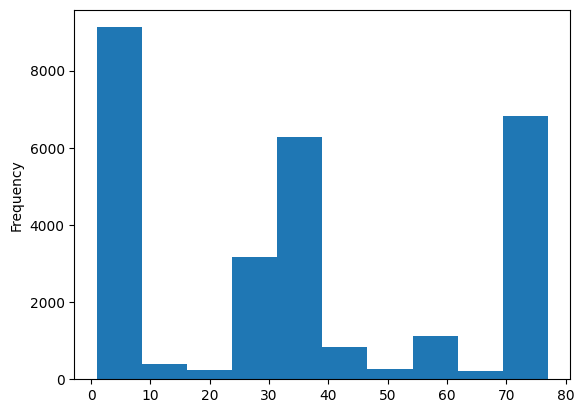

In [13]:
chicago_taxi_dataset['PICKUP_COMMUNITY_AREA'].plot(kind='hist')
plt.plot()

<Axes: ylabel='Frequency'>

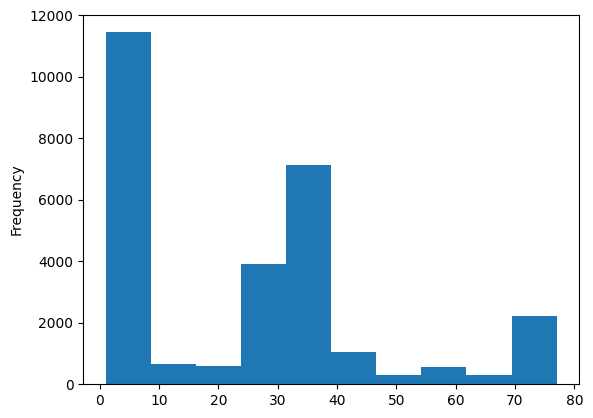

In [14]:
chicago_taxi_dataset['DROPOFF_COMMUNITY_AREA'].plot(kind='hist')

In [15]:
chicago_taxi_dataset['DROPOFF_COMMUNITY_AREA'].fillna(chicago_taxi_dataset['DROPOFF_COMMUNITY_AREA'].mean(), inplace=True)
chicago_taxi_dataset['PICKUP_COMMUNITY_AREA'].fillna(chicago_taxi_dataset['PICKUP_COMMUNITY_AREA'].mean(), inplace=True)

In [32]:
chicago_taxi_dataset.shape

(31694, 20)

In [33]:
chicago_taxi_dataset.head()

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY,n__PAYMENT_TYPE,n__COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,35.562138,17.0,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,35.562138,8.0,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.000000,8.0,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.000000,24.0,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association,Cash,CAT_PEQUE
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.000000,8.0,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab,Cash,Flash Cab


In [34]:
chicago_taxi_dataset.reset_index(inplace=True, drop=False)

In [35]:
chicago_taxi_dataset.head()

,index,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,...,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY,n__PAYMENT_TYPE,n__COMPANY
0,0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,35.562138,...,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab,Mobile,Flash Cab
1,1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,35.562138,...,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab,Credit Card,Flash Cab
2,2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.000000,...,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi,Cash,Sun Taxi
3,3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.000000,...,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association,Cash,CAT_PEQUE
4,4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.000000,...,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab,Cash,Flash Cab


In [36]:
lst_cat = ['PAYMENT_TYPE', 'COMPANY']
lst_num = ['TRIP_START_HOUR', 'TRIP_SECONDS', 'TRIP_MILES', 
           'TRIP_SPEED', 
           #'PICKUP_CENSUS_TRACT', 'DROPOFF_CENSUS_TRACT',
           'PICKUP_COMMUNITY_AREA', 'DROPOFF_COMMUNITY_AREA', 'FARE', 
            'TIPS', 'TIP_RATE', 'TOLLS', 'EXTRAS' ]
lst_drop = ['TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP']

tgt = [ 'TRIP_TOTAL' ]

um = ['index']

In [37]:
chicago_taxi_dataset[ lst_cat + lst_num + lst_drop + tgt ].shape

(31694, 16)

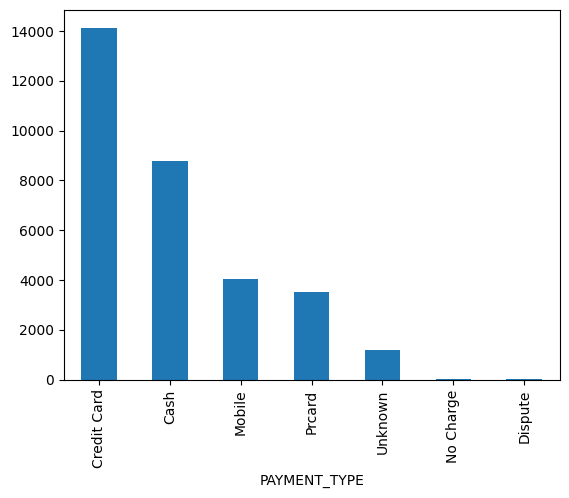

In [38]:
chicago_taxi_dataset['PAYMENT_TYPE'].value_counts().plot(kind='bar')
plt.show()

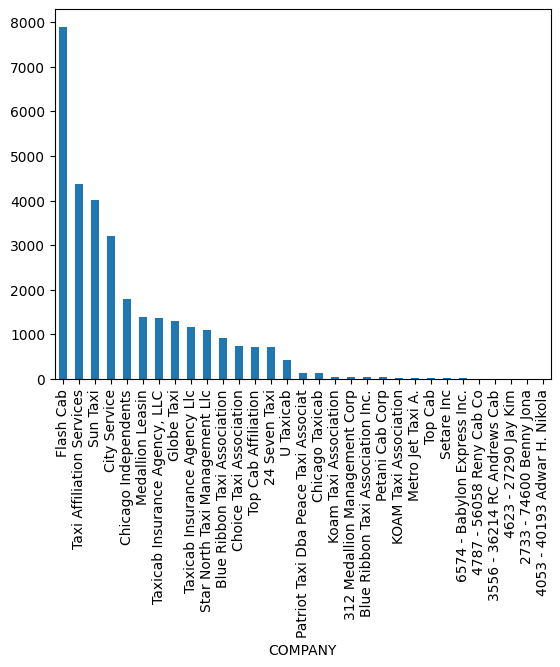

In [20]:
chicago_taxi_dataset[ 'COMPANY' ].value_counts().plot(kind='bar')
plt.show()

In [21]:
def normalizar(df, v, umbral):
    #umbral = 0.03 # 0.05
    aux = df[v].value_counts(True).to_frame()
    aux[f"n__{v}"] = np.where( aux['proportion'] < umbral , 'CAT_PEQUE' ,aux.index )
    
    moda  = aux.head()[f'n__{v}'].values[0]
    
    if aux.loc[ aux[f'n__{v}'] == 'CAT_PEQUE' ]['proportion'].sum() < umbral:
        aux[f'n__{v}'].replace({'CAT_PEQUE':moda},inplace=True)
    
    aux.reset_index(inplace=True)

    return df.merge( aux , left_on=[v] , right_on=[v] , how='inner' ).drop('proportion',axis=1)

In [22]:
umbral = 0.03
for v in lst_cat:
    print(f"Normalizando: {v}")
    chicago_taxi_dataset =  normalizar( chicago_taxi_dataset , v, umbral)

Normalizando: PAYMENT_TYPE
Normalizando: COMPANY


/var/folders/hz/jqhxy08n571fxkqnm7ntk93c0000gn/T/ipykernel_6748/1689179192.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aux[f'n__{v}'].replace({'CAT_PEQUE':moda},inplace=True)


In [23]:
ls_disc = chicago_taxi_dataset.filter( like='n__' ).columns.tolist()
ls_disc

['n__PAYMENT_TYPE', 'n__COMPANY']

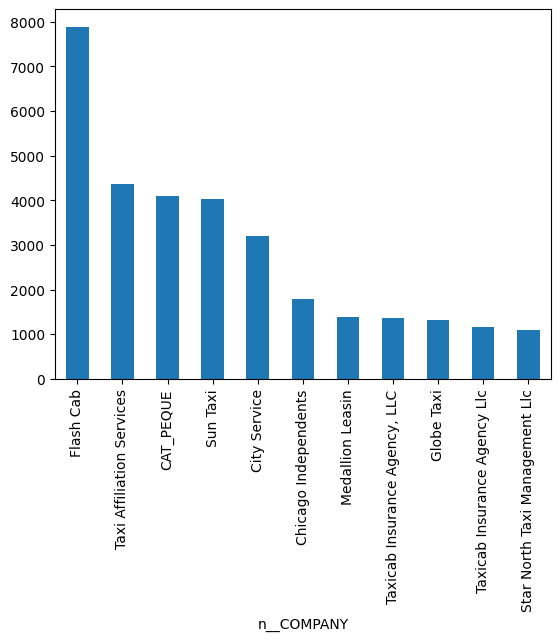

In [24]:
chicago_taxi_dataset[ 'n__COMPANY' ].value_counts().plot(kind='bar')
plt.show()

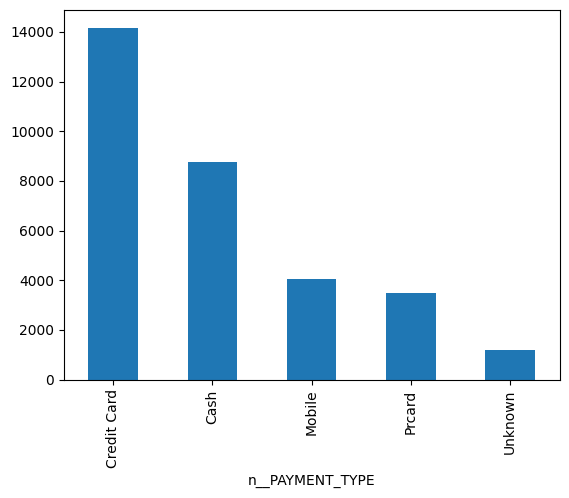

In [25]:
chicago_taxi_dataset[ 'n__PAYMENT_TYPE' ].value_counts().plot(kind='bar')
plt.show()

### Dummies

In [ ]:
pd.get_dummies(chicago_taxi_dataset[ls_disc], columns=ls_disc, dtype=int, drop_first=True)

,n__PAYMENT_TYPE_Credit Card,n__PAYMENT_TYPE_Mobile,n__PAYMENT_TYPE_Prcard,n__PAYMENT_TYPE_Unknown,n__COMPANY_Chicago Independents,n__COMPANY_City Service,n__COMPANY_Flash Cab,n__COMPANY_Globe Taxi,n__COMPANY_Medallion Leasin,n__COMPANY_Star North Taxi Management Llc,n__COMPANY_Sun Taxi,n__COMPANY_Taxi Affiliation Services,n__COMPANY_Taxicab Insurance Agency Llc,"n__COMPANY_Taxicab Insurance Agency, LLC"
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31689,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31690,1,0,0,0,0,0,0,0,0,0,0,0,0,0
31691,0,0,1,0,0,0,0,0,0,0,1,0,0,0
31692,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
chicago_taxi_dataset.head()

,index,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,...,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY,n__PAYMENT_TYPE,n__COMPANY
0,0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,35.562138,...,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab,Mobile,Flash Cab
1,1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,35.562138,...,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab,Credit Card,Flash Cab
2,2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.000000,...,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi,Cash,Sun Taxi
3,3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.000000,...,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association,Cash,CAT_PEQUE
4,4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.000000,...,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab,Cash,Flash Cab


In [46]:
chicago_taxi_dataset[um+lst_num].merge(pd.get_dummies(chicago_taxi_dataset[um + ls_disc], columns=ls_disc, dtype=int, drop_first=True), how='left', on=um).head()

,index,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,...,n__COMPANY_Chicago Independents,n__COMPANY_City Service,n__COMPANY_Flash Cab,n__COMPANY_Globe Taxi,n__COMPANY_Medallion Leasin,n__COMPANY_Star North Taxi Management Llc,n__COMPANY_Sun Taxi,n__COMPANY_Taxi Affiliation Services,n__COMPANY_Taxicab Insurance Agency Llc,"n__COMPANY_Taxicab Insurance Agency, LLC"
0,0,7.25,2341,2.57,4.0,35.562138,17.0,31.99,2.0,6.3,...,0,0,1,0,0,0,0,0,0,0
1,1,17.25,1074,1.18,4.0,35.562138,8.0,9.75,3.0,27.9,...,0,0,1,0,0,0,0,0,0,0
2,2,17.25,1173,1.29,4.0,32.000000,8.0,10.25,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,3,18.00,3360,3.70,4.0,32.000000,24.0,23.75,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,17.00,1044,1.15,4.0,32.000000,8.0,10.00,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
X = chicago_taxi_dataset[ um + lst_num ]\
        .merge(
            pd.get_dummies(chicago_taxi_dataset[ um + ls_disc ], columns=ls_disc, dtype=int, drop_first=True),
            on=um,
            how='left'
        )

y = chicago_taxi_dataset[ um + tgt ]

In [48]:
X.head()

,index,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,...,n__COMPANY_Chicago Independents,n__COMPANY_City Service,n__COMPANY_Flash Cab,n__COMPANY_Globe Taxi,n__COMPANY_Medallion Leasin,n__COMPANY_Star North Taxi Management Llc,n__COMPANY_Sun Taxi,n__COMPANY_Taxi Affiliation Services,n__COMPANY_Taxicab Insurance Agency Llc,"n__COMPANY_Taxicab Insurance Agency, LLC"
0,0,7.25,2341,2.57,4.0,35.562138,17.0,31.99,2.0,6.3,...,0,0,1,0,0,0,0,0,0,0
1,1,17.25,1074,1.18,4.0,35.562138,8.0,9.75,3.0,27.9,...,0,0,1,0,0,0,0,0,0,0
2,2,17.25,1173,1.29,4.0,32.000000,8.0,10.25,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,3,18.00,3360,3.70,4.0,32.000000,24.0,23.75,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,17.00,1044,1.15,4.0,32.000000,8.0,10.00,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
y.head()

,index,TRIP_TOTAL
0,0,33.99
1,1,14.25
2,2,10.25
3,3,24.75
4,4,10.00


In [50]:
X.isna().sum() / X.shape[0]*100

index                                        0.0
TRIP_START_HOUR                              0.0
TRIP_SECONDS                                 0.0
TRIP_MILES                                   0.0
TRIP_SPEED                                   0.0
PICKUP_COMMUNITY_AREA                        0.0
DROPOFF_COMMUNITY_AREA                       0.0
FARE                                         0.0
TIPS                                         0.0
TIP_RATE                                     0.0
TOLLS                                        0.0
EXTRAS                                       0.0
n__PAYMENT_TYPE_Credit Card                  0.0
n__PAYMENT_TYPE_Mobile                       0.0
n__PAYMENT_TYPE_Prcard                       0.0
n__PAYMENT_TYPE_Unknown                      0.0
n__COMPANY_Chicago Independents              0.0
n__COMPANY_City Service                      0.0
n__COMPANY_Flash Cab                         0.0
n__COMPANY_Globe Taxi                        0.0
n__COMPANY_Medallion

## Mejores variables

In [51]:
predictoras = [ x for x in X.columns.to_list() if x not in ['index']]
print(predictoras)

['TRIP_START_HOUR', 'TRIP_SECONDS', 'TRIP_MILES', 'TRIP_SPEED', 'PICKUP_COMMUNITY_AREA', 'DROPOFF_COMMUNITY_AREA', 'FARE', 'TIPS', 'TIP_RATE', 'TOLLS', 'EXTRAS', 'n__PAYMENT_TYPE_Credit Card', 'n__PAYMENT_TYPE_Mobile', 'n__PAYMENT_TYPE_Prcard', 'n__PAYMENT_TYPE_Unknown', 'n__COMPANY_Chicago Independents', 'n__COMPANY_City Service', 'n__COMPANY_Flash Cab', 'n__COMPANY_Globe Taxi', 'n__COMPANY_Medallion Leasin', 'n__COMPANY_Star North Taxi Management Llc', 'n__COMPANY_Sun Taxi', 'n__COMPANY_Taxi Affiliation Services', 'n__COMPANY_Taxicab Insurance Agency Llc', 'n__COMPANY_Taxicab Insurance Agency, LLC']


In [52]:
from sklearn.feature_selection import SelectKBest, f_regression

kb = SelectKBest( k=5, score_func=f_regression)
kb.fit(X[ predictoras ], y[ tgt ])

/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=5, score_func=<function f_regression at 0x1431e96c0>)

In [53]:
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
ls_best

['TRIP_START_HOUR',
 'TRIP_SECONDS',
 'TRIP_MILES',
 'DROPOFF_COMMUNITY_AREA',
 'FARE']

In [54]:
X = pd.DataFrame(kb.transform(X[ predictoras ]), columns=ls_best)
X

,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,DROPOFF_COMMUNITY_AREA,FARE
0,2341.0,2.57,4.0,31.99,2.00
1,1074.0,1.18,4.0,9.75,3.00
2,1173.0,1.29,4.0,10.25,0.00
3,3360.0,3.70,4.0,23.75,0.00
4,1044.0,1.15,4.0,10.00,0.00
...,...,...,...,...,...
31689,739.0,13.06,63.6,32.50,0.00
31690,1740.0,30.90,63.9,44.50,10.00
31691,687.0,12.21,64.0,30.75,0.00
31692,2040.0,36.60,64.6,41.75,11.55


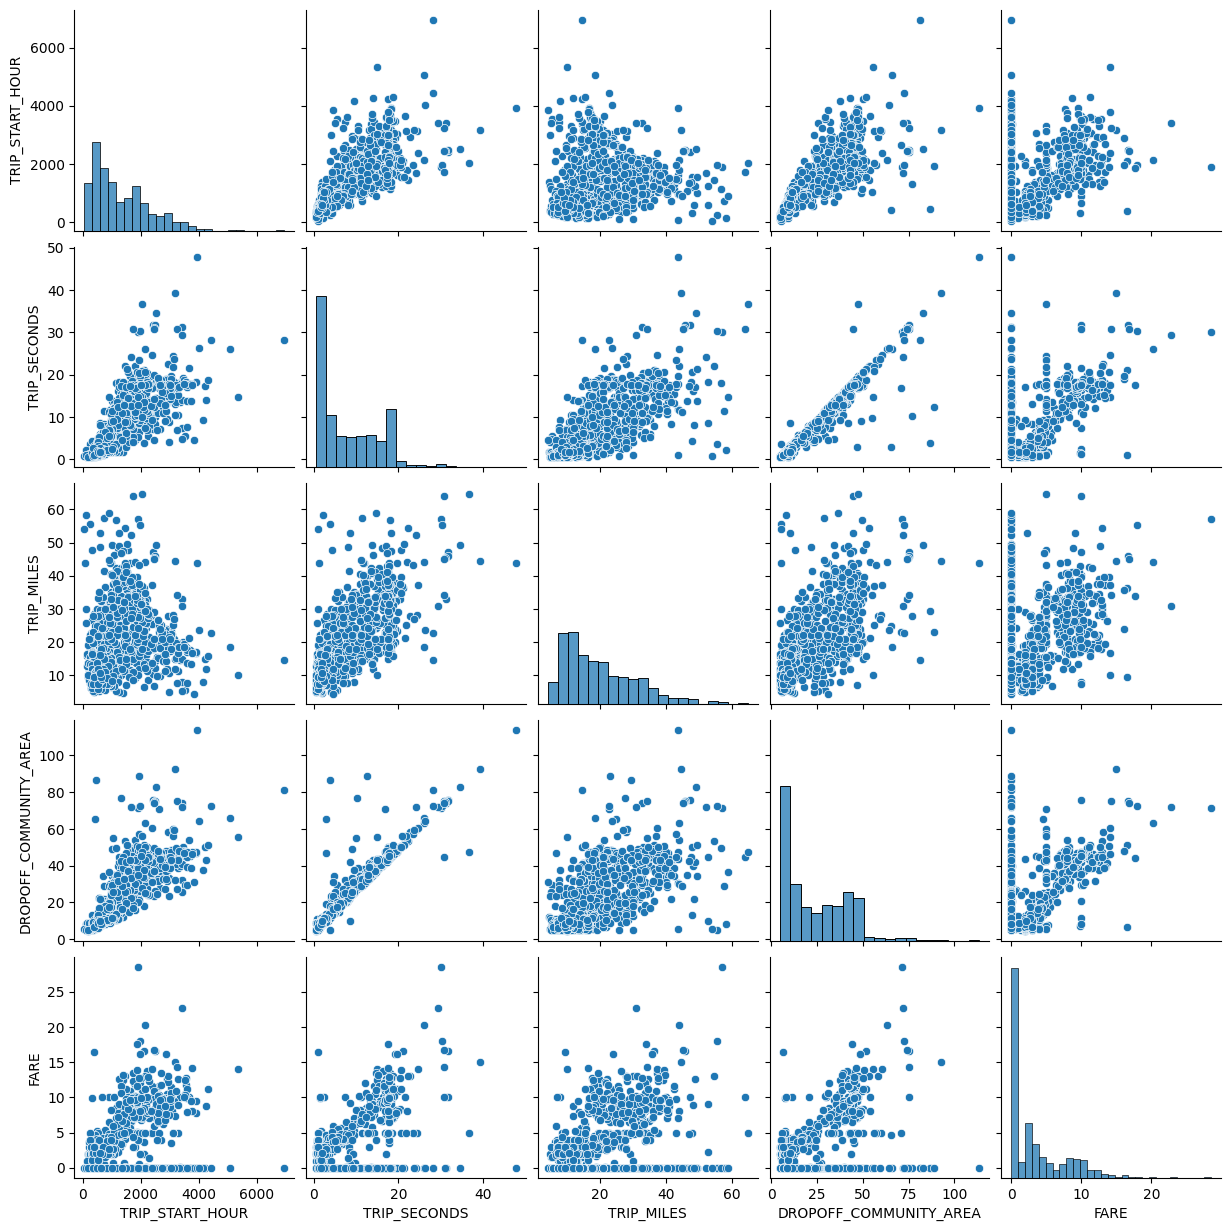

In [55]:
sns.pairplot(X.sample(1000))

In [56]:
y = y[ tgt ]
y

,TRIP_TOTAL
0,33.99
1,14.25
2,10.25
3,24.75
4,10.00
...,...
31689,32.50
31690,82.00
31691,30.75
31692,57.30


# Modelo

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [58]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [59]:
linreg.score(X_train, y_train)

0.9562688558235456

In [60]:
from sklearn.model_selection import cross_val_score

ls_scores = cross_val_score(cv = 4, estimator=linreg, X=X_train, y=y_train)
ls_scores

array([0.95877368, 0.95497637, 0.95528293, 0.95515431])

In [61]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Make predictions.
y_pred = linreg.predict(X_test[X_train.columns])

# Calculate and print errors.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")

rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
print(f"Mean Absolute Error: {mae:.4f}")

R-squared: 0.9586
Mean squared error: 21.6344
Root mean squared error: 4.6513
Mean Absolute Error: 2.2832


Text(0, 0.5, 'Predicted Values')

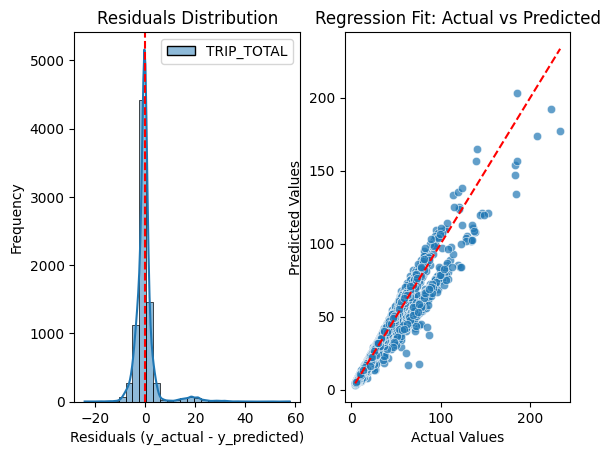

In [77]:
# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
residuals = y_test - linreg.predict(X_test)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")

# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test['TRIP_TOTAL'], y=linreg.predict(X_test).flatten(), alpha=0.7)
plt.plot([min(y_test['TRIP_TOTAL']), max(y_test['TRIP_TOTAL'])], [min(y_test['TRIP_TOTAL']), max(y_test['TRIP_TOTAL'])], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")